# Style Transfer

In [54]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

content_path = tf.keras.utils.get_file('dancer_dress', 'http://activefitness.ai/wp-content/uploads/2020/11/dancer_dress.png')

style_path = tf.keras.utils.get_file('Renoir_Parisienne',
                                     'https://upload.wikimedia.org/wikipedia/commons/8/86/Pierre-Auguste_Renoir_089.jpg')


311296/303919 [==============================] - 0s 0us/step


In [24]:
def img_scaler(image, max_dim = 512):

  # Casts a tensor to a new type.
  original_shape = tf.cast(tf.shape(image)[:-1], tf.float32)

  # Creates a scale constant for the image
  scale_ratio = max_dim / max(original_shape)

  # Casts a tensor to a new type.
  new_shape = tf.cast(original_shape * scale_ratio, tf.int32)

  # Resizes the image based on the scaling constant generated above
  return tf.image.resize(image, new_shape)

In [25]:
def load_img(path_to_img):

  # Reads and outputs the entire contents of the input filename.
  img = tf.io.read_file(path_to_img)

  # Detect whether an image is a BMP, GIF, JPEG, or PNG, and 
  # performs the appropriate operation to convert the input 
  # bytes string into a Tensor of type dtype
  img = tf.image.decode_image(img, channels=3)

  # Convert image to dtype, scaling (MinMax Normalization) its values if needed.
  img = tf.image.convert_image_dtype(img, tf.float32)

  # Scale the image using the custom function we created
  img = img_scaler(img)

  # Adds a fourth dimension to the Tensor because
  # the model requires a 4-dimensional Tensor
  return img[tf.newaxis, :]

In [58]:
content_image = load_img(content_path)
style_image = load_img(style_path)

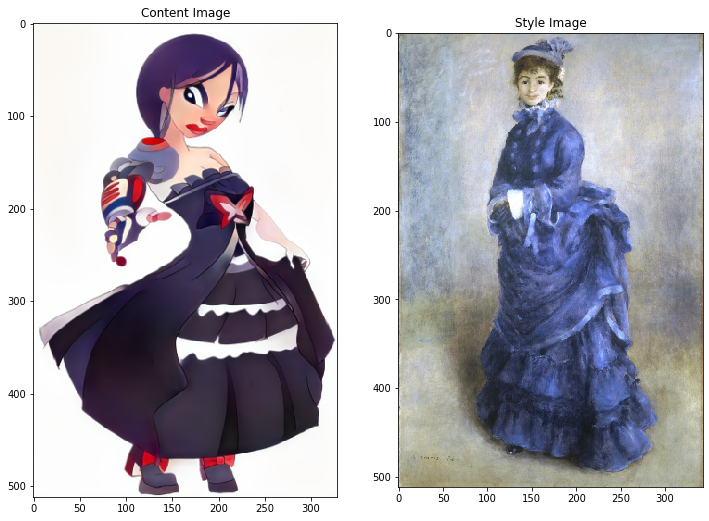

In [59]:


plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(content_image[0])
plt.title('Content Image')
plt.subplot(1, 2, 2)
plt.imshow(style_image[0])
plt.title('Style Image')

plt.show()

In [60]:
import tensorflow_hub as hub

# Load Magenta's Arbitrary Image Stylization network from TensorFlow Hub  
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')

# Pass content and style images as arguments in TensorFlow Constant object format
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]

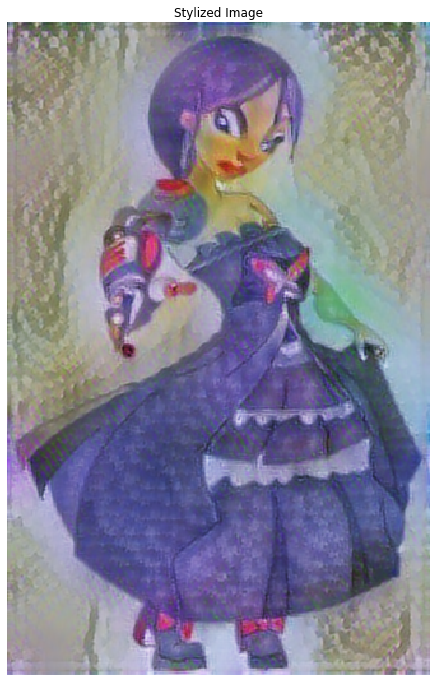

In [61]:
# Set the size of the plot figure
plt.figure(figsize=(12, 12))

# Plot the stylized image
plt.imshow(stylized_image[0])

# Add title to the plot
plt.title('Stylized Image')

# Hide axes
plt.axis('off')

# Show the plot
plt.show()